# HOTEL BOOKING CANCELLATION ANALYSIS

## Importing required python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing hotel booking dataset for analysis

In [2]:
df = pd.read_csv('hotel_booking.csv')

## EDA and Cleaning

In [3]:
# Let's see how imported data looks

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
for i in df.columns:
    print(i+':',df[i].unique(),sep='\n')
    print('-----------------------')

hotel:
['Resort Hotel' 'City Hotel']
-----------------------
is_canceled:
[0 1]
-----------------------
lead_time:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 

In [7]:
# Checking if there are any null values present in the dataset

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# As 'agent' & 'company' are not required for our analysis purpose, let's drop the entire columns along with some other 
# unnecessary columns from the dataframe and drop remaining null rows

df = df.drop(['agent','company','name', 'email','phone-number', 'credit_card'],axis=1)
df.dropna(inplace=True)

In [9]:
# Let's check for the cleaned dataset and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [10]:
# Updating data type of 'reservation_status_date' column to 'datetime' format

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
# Summarizing 'object' type data

df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [12]:
# Summarizing 'numerical' type data

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

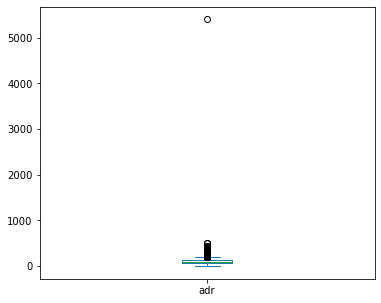

In [13]:
# As 'adr' column is going to be important aspect of our analysis, let's check for outliers and normalise it

df['adr'].plot(kind='box',figsize=(6,5))

In [14]:
df = df[df['adr']<5000]

<AxesSubplot:>

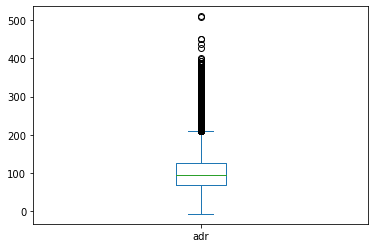

In [15]:
df['adr'].plot(kind='box')

## Analysis and Visualisation

Reservation Status(%):
0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


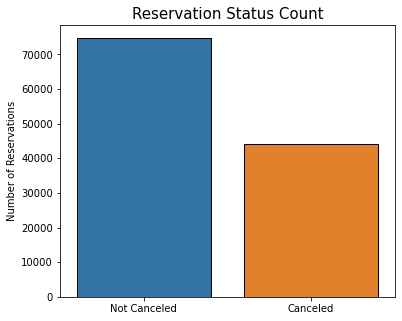

In [16]:
# Checking for the proportion of canceled reservations

df_canceled_percent = df['is_canceled'].value_counts(normalize=True)
print('Reservation Status(%):',df_canceled_percent,sep='\n')

plt.figure(figsize=(6,5))
sns.barplot(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='black')
plt.title('Reservation Status Count', fontsize=15)
plt.ylabel('Number of Reservations')
plt.show()

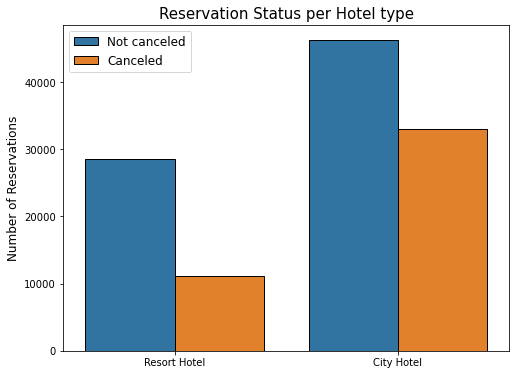

In [17]:
# Reservation Status according to the type of hotel

plt.figure(figsize=(8,6))
axl = sns.countplot(x='hotel',hue='is_canceled',data=df, edgecolor='black')
legends_labels,_ = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1,1))

plt.title('Reservation Status per Hotel type',fontsize=15)
plt.xlabel('')
plt.ylabel('Number of Reservations',fontsize=12)
plt.legend(['Not canceled','Canceled'],fontsize=12)
plt.show()

Reservation Status for Resort Hotel(%):
0    0.72025
1    0.27975
Name: is_canceled, dtype: float64


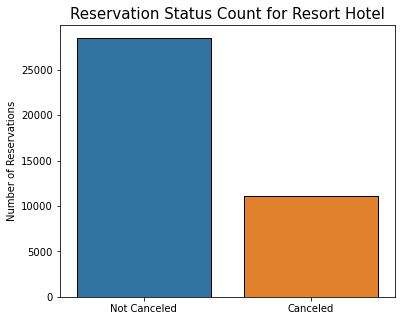

In [18]:
# Reservation Status Count for Resort Hotel

resort_hotel = df[df['hotel'] == 'Resort Hotel']
print('Reservation Status for Resort Hotel(%):',resort_hotel['is_canceled'].value_counts(normalize=True),sep='\n')

plt.figure(figsize=(6,5))
sns.barplot(['Not Canceled','Canceled'],resort_hotel['is_canceled'].value_counts(),edgecolor='black')
plt.title('Reservation Status Count for Resort Hotel',fontsize=15)
plt.ylabel('Number of Reservations')
plt.show()

Reservation Status for City Hotel(%):
0    0.582918
1    0.417082
Name: is_canceled, dtype: float64


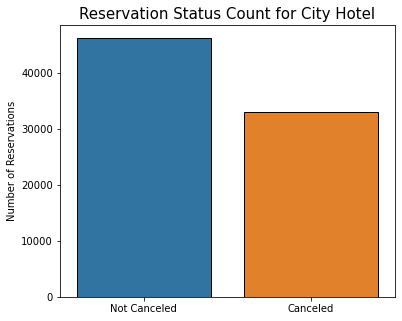

In [19]:
# Reservation Status Count for City Hotel

city_hotel = df[df['hotel'] == 'City Hotel']
print('Reservation Status for City Hotel(%):',city_hotel['is_canceled'].value_counts(normalize=True),sep='\n')

plt.figure(figsize=(6,5))
sns.barplot(['Not Canceled','Canceled'],city_hotel['is_canceled'].value_counts(),edgecolor='black')
plt.title('Reservation Status Count for City Hotel',fontsize=15)
plt.ylabel('Number of Reservations')
plt.show()

Hotelwise ADR:
hotel
City Hotel      105.259703
Resort Hotel     95.347555
Name: adr, dtype: float64


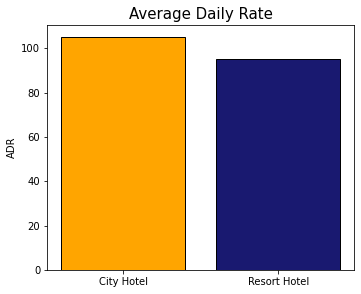

In [20]:
# Average Daily Rate (ADR) for City and Resort hotels

print('Hotelwise ADR:',df.groupby('hotel')['adr'].mean(),sep='\n')

df_hotel_adr = pd.DataFrame(df.groupby('hotel')['adr'].mean())

plt.figure(figsize=(5.5,4.5))
plt.bar(x=df_hotel_adr.index,height='adr',data=df_hotel_adr,color=['orange','midnightblue'],edgecolor='black')
plt.title('Average Daily Rate',fontsize=15)
plt.ylabel('ADR')
plt.show()

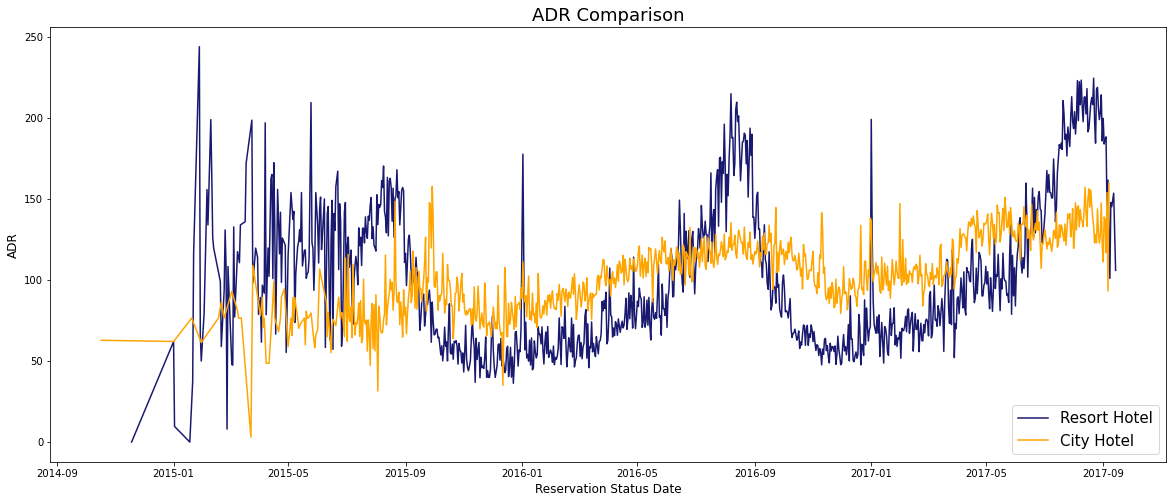

In [21]:
# Compairing datewise 'adr' for Resort & City hotel

resort_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20,8))
plt.title('ADR Comparison', fontsize=18)
plt.plot(resort_adr.index,resort_adr['adr'],label='Resort Hotel',color='midnightblue')
plt.plot(city_adr.index,city_adr['adr'],label='City Hotel',color='orange')
plt.xlabel('Reservation Status Date',fontsize=12)
plt.ylabel('ADR',fontsize=12)
plt.legend(fontsize=15)
plt.show()

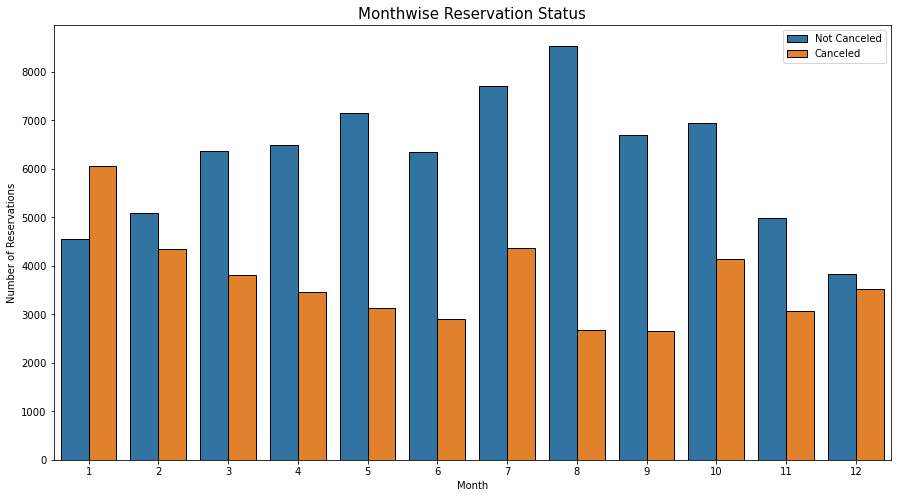

In [22]:
# Creating 'month' column in order to perform monthwise analysis

df['month'] = df['reservation_status_date'].dt.month

# Monthwise Reservation Status

plt.figure(figsize=(15,8))
sns.countplot(x='month',hue='is_canceled',data=df,edgecolor='black')
plt.legend(['Not Canceled','Canceled'])
plt.title('Monthwise Reservation Status',fontsize=15)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Number of Reservations',fontsize=10)
plt.show()

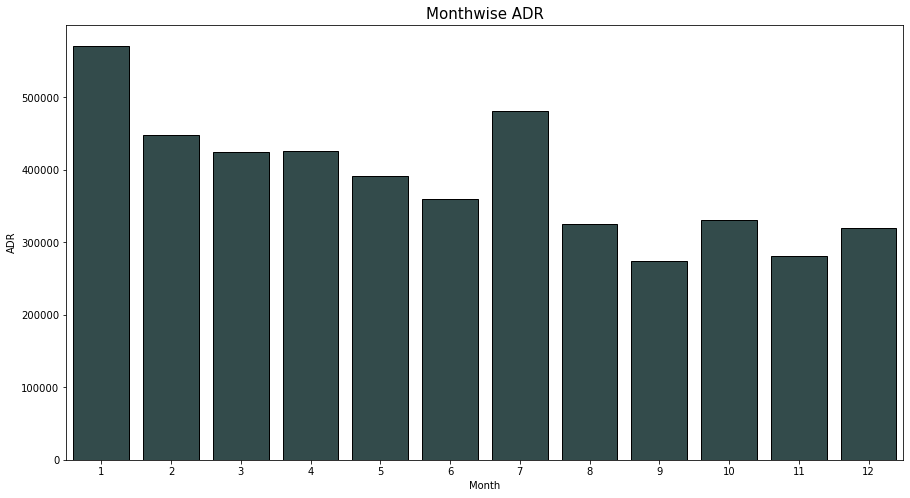

In [23]:
# ADR per month

plt.figure(figsize=(15,8))
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index(),color='darkslategrey',edgecolor='black')
plt.title('Monthwise ADR',fontsize=15)
plt.xlabel('Month',fontsize=10)
plt.ylabel('ADR',fontsize=10)
plt.show()

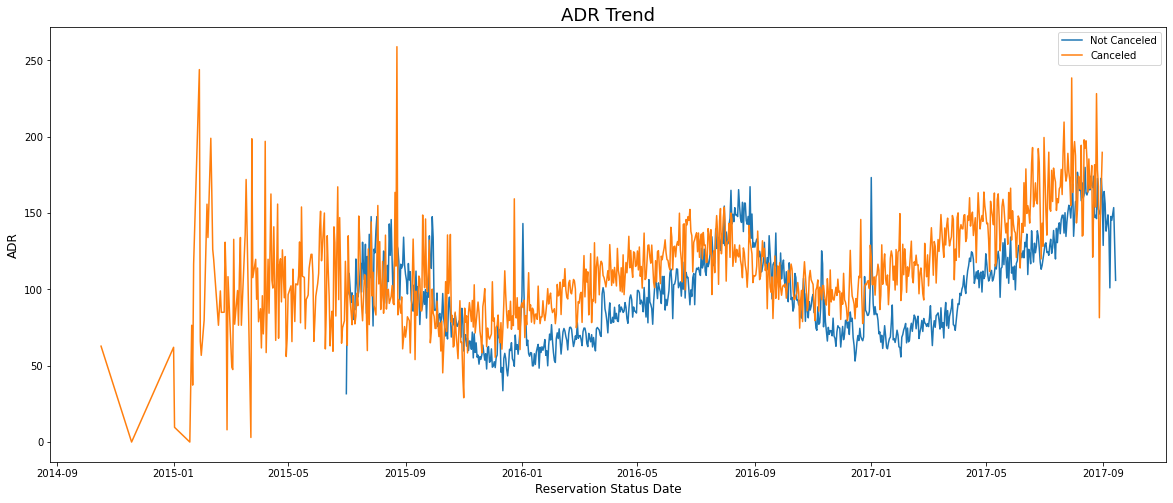

In [24]:
# Compairing trend in 'adr' over the period of time

df_canceled = df[df['is_canceled'] == 1]
df_not_canceled = df[df['is_canceled'] == 0]

df_canceled_adr = df_canceled.groupby('reservation_status_date')[['adr']].mean().reset_index()
df_not_canceled_adr = df_not_canceled.groupby('reservation_status_date')[['adr']].mean().reset_index()

plt.figure(figsize=(20,8))
plt.plot(df_not_canceled_adr['reservation_status_date'],df_not_canceled_adr['adr'],label='Not Canceled')
plt.plot(df_canceled_adr['reservation_status_date'],df_canceled_adr['adr'],label='Canceled')
plt.title('ADR Trend',fontsize=18)
plt.xlabel('Reservation Status Date',fontsize=12)
plt.ylabel('ADR',fontsize=12)
plt.legend()
plt.show()

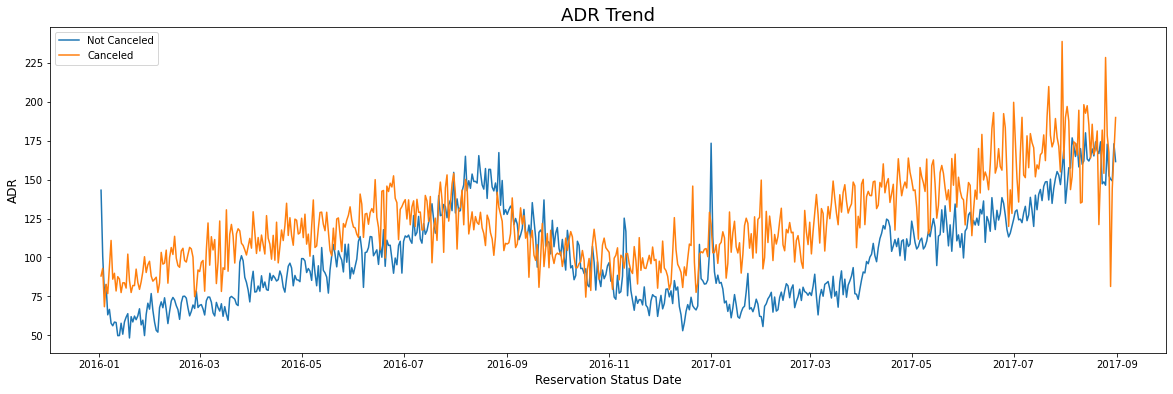

In [25]:
# Reducing the timeframe for better understanding of visualization

df_canceled_adr = df_canceled_adr[(df_canceled_adr['reservation_status_date']>'2016') & (df_canceled_adr['reservation_status_date']<'2017-09')]
df_not_canceled_adr= df_not_canceled_adr[(df_not_canceled_adr['reservation_status_date']>'2016') & (df_not_canceled_adr['reservation_status_date']<'2017-09')]

plt.figure(figsize=(20,6))
plt.plot(df_not_canceled_adr['reservation_status_date'],df_not_canceled_adr['adr'],label='Not Canceled')
plt.plot(df_canceled_adr['reservation_status_date'],df_canceled_adr['adr'],label='Canceled')
plt.title('ADR Trend',fontsize=18)
plt.xlabel('Reservation Status Date',fontsize=12)
plt.ylabel('ADR',fontsize=12)
plt.legend()
plt.show()

Reservation Status & Average Waiting Days:
is_canceled
0    1.598823
1    3.569895
Name: days_in_waiting_list, dtype: float64


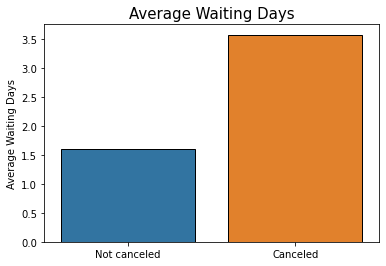

In [26]:
# The average days in waiting list, when the reservation is canceled and when it is not

avg_waiting = df.groupby('is_canceled')['days_in_waiting_list'].mean()
print('Reservation Status & Average Waiting Days:',avg_waiting,sep='\n')

sns.barplot(x=['Not canceled','Canceled'], y='days_in_waiting_list',data=df.groupby('is_canceled')[['days_in_waiting_list']].mean(),edgecolor='black')
plt.title('Average Waiting Days',fontsize=15)
plt.ylabel('Average Waiting Days',fontsize=10)
plt.show()

City Hotel - Reservation Status & Average Waiting Days:
is_canceled
0    2.150175
1    4.734271
Name: days_in_waiting_list, dtype: float64


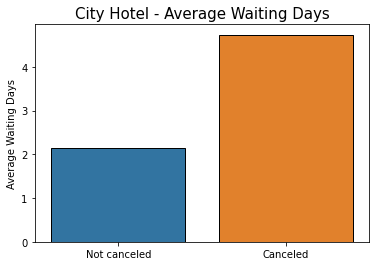

Resort Hotel - Reservation Status & Average Waiting Days:
is_canceled
0    0.705144
1    0.093166
Name: days_in_waiting_list, dtype: float64


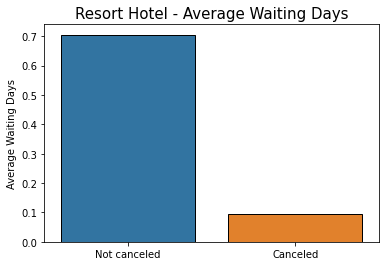

In [27]:
# The average days in waiting list, when the reservation is canceled and when it is not

city_avg_waiting = city_hotel.groupby('is_canceled')['days_in_waiting_list'].mean()
print('City Hotel - Reservation Status & Average Waiting Days:',city_avg_waiting,sep='\n')

sns.barplot(x=['Not canceled','Canceled'], y='days_in_waiting_list',data=city_hotel.groupby('is_canceled')[['days_in_waiting_list']].mean(),edgecolor='black')
plt.title('City Hotel - Average Waiting Days',fontsize=15)
plt.ylabel('Average Waiting Days',fontsize=10)
plt.show()

# The average days in waiting list, when the reservation is canceled and when it is not

resort_avg_waiting = resort_hotel.groupby('is_canceled')['days_in_waiting_list'].mean()
print('Resort Hotel - Reservation Status & Average Waiting Days:',resort_avg_waiting,sep='\n')

sns.barplot(x=['Not canceled','Canceled'], y='days_in_waiting_list',data=resort_hotel.groupby('is_canceled')[['days_in_waiting_list']].mean(),edgecolor='black')
plt.title('Resort Hotel - Average Waiting Days',fontsize=15)
plt.ylabel('Average Waiting Days',fontsize=10)
plt.show()

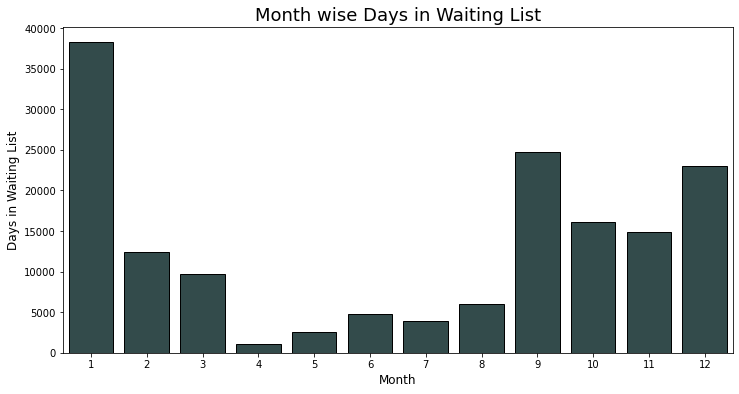

In [28]:
# Monthwise average days in waiting list, when the reservation is canceled

plt.figure(figsize=(12,6))
sns.barplot('month','days_in_waiting_list',data=df[df['is_canceled']==1].groupby('month')[['days_in_waiting_list']].sum().reset_index(),color='darkslategrey',edgecolor='black')
plt.title('Month wise Days in Waiting List',fontsize=18)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Days in Waiting List',fontsize=12)
plt.show()

In [29]:
# Percentage reservations canceled when assigned room type is different from reserved one

different_room_type_cancellation = len(df_canceled[df_canceled['reserved_room_type']!=df_canceled['assigned_room_type']])/len(df[df['reserved_room_type']!=df['assigned_room_type']])
print('Cancellation rate when Assigned room type is different than Reserved one:', round(different_room_type_cancellation*100,2),'%')

Cancellation rate when Assigned room type is different than Reserved one: 5.39 %


Countries with Highest Reservation Count:
PRT    48585
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64
----------------------
Countries with Highest Cancellation Rate:
PRT    0.566306
ITA    0.353956
ESP    0.254085
GBR    0.202243
FRA    0.185694
Name: country, dtype: float64
----------------------


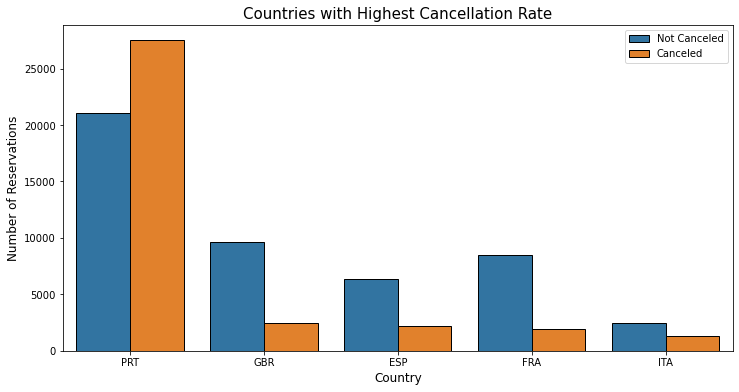

In [30]:
# Finding Top 5 countries with highest number of cancellations

country_reservations = df['country'].value_counts()
print('Countries with Highest Reservation Count:',country_reservations[:5],sep='\n')
print('----------------------')

country_cancellations = df[(df['is_canceled']==1)]['country'].value_counts()[:5].index
country_cancellations_rate = df[(df['is_canceled']==1) & (df['country'].isin(country_cancellations))]['country'].value_counts()/df[df['country'].isin(country_cancellations)]['country'].value_counts()
print('Countries with Highest Cancellation Rate:',country_cancellations_rate.sort_values(ascending=False)[:5],sep='\n')
print('----------------------')

df_top5_country = df[df['country'].isin(country_cancellations_rate.index[:5])]

plt.figure(figsize=(12,6))
sns.countplot(x='country',hue='is_canceled',data=df_top5_country,edgecolor='black')
plt.legend(['Not Canceled','Canceled'])
plt.title('Countries with Highest Cancellation Rate',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Reservations',fontsize=12)
plt.show()

Market Segment wise Reservations:
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64


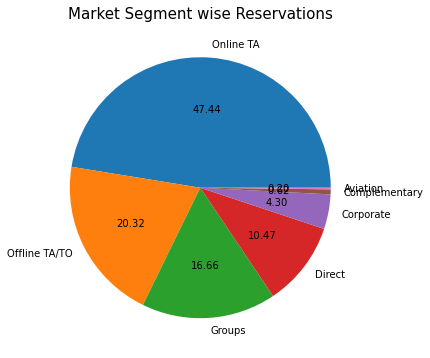

In [31]:
# Number of Reservations for each Market Segment

df_market_segment = df['market_segment'].value_counts()
print('Market Segment wise Reservations:',df_market_segment,sep='\n')
plt.figure(figsize=(6,6))
plt.pie(df_market_segment, autopct='%0.2f',labels=df_market_segment.index)
plt.title('Market Segment wise Reservations',fontsize=15)
plt.show()

Market Segment wise Cancellation Rate:
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64


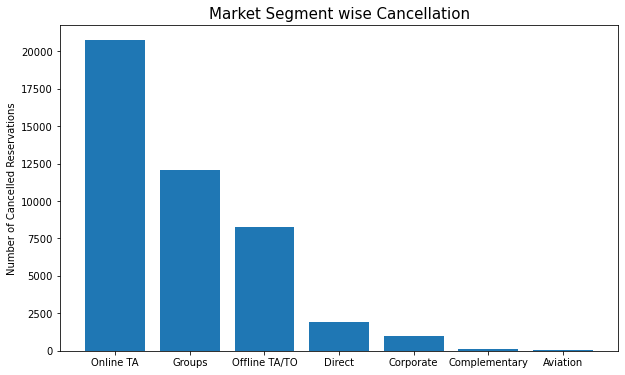

In [32]:
# Market Segmentwise cancellations

df_market_segment_cancellation = df[df['is_canceled']==1]['market_segment'].value_counts()
print('Market Segment wise Cancellation Rate:',df[df['is_canceled']==1]['market_segment'].value_counts(normalize=True),sep='\n')

plt.figure(figsize=(10,6))
plt.bar(x=df_market_segment_cancellation.index,height=df_market_segment_cancellation.values,data=df_market_segment_cancellation)
plt.title('Market Segment wise Cancellation',fontsize=15)
plt.ylabel('Number of Cancelled Reservations')
plt.show()